<h1>Jan Andersson - sba20368</h1>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Supressing warnings</h3>
<p>Supressing warning in pandas library when doing some operations as they take up most of the space of the output and are not code critical</p>

In [2]:
import warnings
warnings.filterwarnings("ignore")

<h3>Loading data and preparing data</h3>
<p>Loading the data into a dataframe from a Comma-separated values (CSV) dataset titled:
<ul>
  <li><code>cattle_births_month_county.csv</code></li>
  <li><code>Supply.csv</code></li>
  <li><code>Milk_Sales_for_Human_Consumption.csv</code></li>
</ul>

<h4>The aim</h4>
To load the dataset using the CSV pandas load protocol and present the metadata of the dataset in order to get aquianted with the shape of the data.

In [3]:
data_Births = pd.read_csv('cattle_births_month_county.csv')
data_Supply = pd.read_csv('Supply.csv')
data_Eu = pd.read_csv('Eu_supply.csv')

# Cattle Births Data

In [4]:
data_Births.head(5)

,BIRTH_YEAR,COUNTY_ORIGIN,BIRTH_MONTH,CALF_BREED_TYPE,TOTAL_BIRTH
0,2016,CARLOW,APR,BEEF,3670
1,2016,CARLOW,APR,DAIRY,680
2,2016,CARLOW,AUG,BEEF,778
3,2016,CARLOW,AUG,DAIRY,80
4,2016,CARLOW,DEC,BEEF,835


In [5]:
data_Births['TOTAL_BIRTH'].describe(include='all')

count      624.000000
mean      3654.964744
std       7010.470855
min          6.000000
25%        454.500000
50%       1561.500000
75%       3825.750000
max      95720.000000
Name: TOTAL_BIRTH, dtype: float64

<h2>Created 95% confidence interval for population mean size</h2>

In [6]:
data = data_Births['TOTAL_BIRTH']
#create 95% confidence interval for population mean births
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 

(3103.843027719479, 4206.086459460009)

There is a 95% chance that the confidence interval of [3103.843027719479, 4206.086459460009] contains the true population mean of cattle Births.

<h2>Created 99% confidence interval for population mean size</h2>

In [7]:
#create 99% confidence interval for population mean births
st.norm.interval(alpha=0.99, loc=np.mean(data), scale=st.sem(data))

(2932.075149970884, 4377.854337208603)

There is a 99% chance that the confidence interval of [2932.075149970884, 4377.854337208603] contains the true population mean of cattle Births.

<h1>Converting data to categorical</h1>
I converted the data into categorical for the month of cattle birth and breed type.
</br>
<b>Where:</b>
JAN:1
FEB:2
MAR:3
APR:4
MAY:5
JUN:6
JUL:7
AUG:8
SEP:9
OCT:10
NOV:11
DEC:12
</br>
<b>and</b> 
</br>
BEEF:1
DAIRY:2

In [8]:
data_Births['BIRTH_MONTH'] = data_Births['BIRTH_MONTH'].replace(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'],['1','2','3','4','5','6','7','8','9','10','11','12'])
display(data_Births)

,BIRTH_YEAR,COUNTY_ORIGIN,BIRTH_MONTH,CALF_BREED_TYPE,TOTAL_BIRTH
0,2016,CARLOW,4,BEEF,3670
1,2016,CARLOW,4,DAIRY,680
2,2016,CARLOW,8,BEEF,778
3,2016,CARLOW,8,DAIRY,80
4,2016,CARLOW,12,BEEF,835
...,...,...,...,...,...
619,2016,WICKLOW,11,DAIRY,956
620,2016,WICKLOW,10,BEEF,1308
621,2016,WICKLOW,10,DAIRY,1217
622,2016,WICKLOW,9,BEEF,1210


In [9]:
data_Births['CALF_BREED_TYPE'] = data_Births['CALF_BREED_TYPE'].replace(['BEEF','DAIRY'],['1','2'])
display(data_Births)
data_Births.info()

,BIRTH_YEAR,COUNTY_ORIGIN,BIRTH_MONTH,CALF_BREED_TYPE,TOTAL_BIRTH
0,2016,CARLOW,4,1,3670
1,2016,CARLOW,4,2,680
2,2016,CARLOW,8,1,778
3,2016,CARLOW,8,2,80
4,2016,CARLOW,12,1,835
...,...,...,...,...,...
619,2016,WICKLOW,11,2,956
620,2016,WICKLOW,10,1,1308
621,2016,WICKLOW,10,2,1217
622,2016,WICKLOW,9,1,1210


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   BIRTH_YEAR       624 non-null    int64 
 1   COUNTY_ORIGIN    624 non-null    object
 2   BIRTH_MONTH      624 non-null    object
 3   CALF_BREED_TYPE  624 non-null    object
 4   TOTAL_BIRTH      624 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 24.5+ KB


I converted the column to an int data type after encoding it as a numeric value which allowed me to use seaborn to visualize the confidence interval of the total births against the months we encoded earlier.

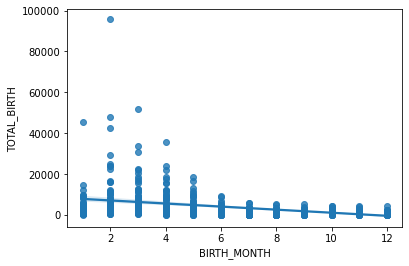

In [10]:
data_Births['BIRTH_MONTH'] = data_Births['BIRTH_MONTH'].astype('int')
ax = sns.regplot(data_Births['BIRTH_MONTH'],data_Births['TOTAL_BIRTH'])

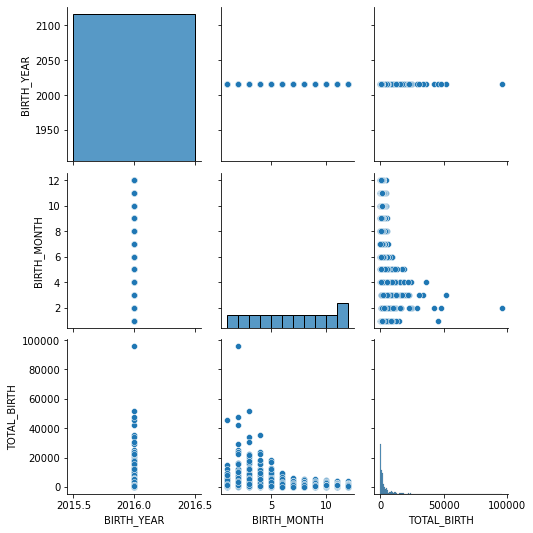

In [11]:
sns.pairplot(data_Births)

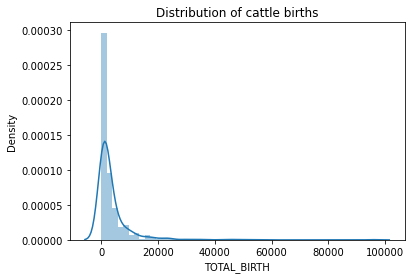

In [12]:
sns.distplot(data_Births['TOTAL_BIRTH']).set(title='Distribution of cattle births')
plt.show()

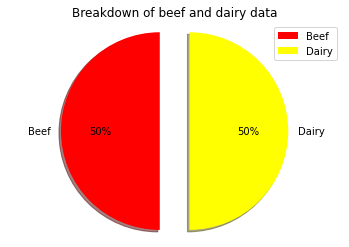

<Figure size 7200x4800 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt 
sizes= data_Births['CALF_BREED_TYPE'].value_counts()
colors=['red', 'yellow']
labels= ['Beef', 'Dairy']
plt.pie(sizes, labels=labels, colors=colors ,startangle=90, shadow=True, explode=(0.2, 0.1) ,autopct='%1.0f%%')
plt.title('Breakdown of beef and dairy data')
plt.axis('equal')
plt.legend(labels, loc="best")
plt.figure(dpi=1200)
plt.show()

As we can see the data for the cattle births is equaly distributed for the Dairy and Beef. Meaning the data has a valid amount of entrees for both groups of cultivated animals and holds integrity.

# Dairy Supply Data

In [14]:
data_Supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        1100 non-null   object 
 1   Statistic Label  1100 non-null   object 
 2   TLIST(A1)        1100 non-null   int64  
 3   Year             1100 non-null   int64  
 4   C02064V02491     1100 non-null   int64  
 5   Product Type     1100 non-null   object 
 6   UNIT             1100 non-null   object 
 7   VALUE            893 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 68.9+ KB


In [15]:
data_Supply.head(5)

,STATISTIC,Statistic Label,TLIST(A1),Year,C02064V02491,Product Type,UNIT,VALUE
0,ABA02C01,Usable Dairy Production,1992,1992,3,Cheese,Tonnes,94.0
1,ABA02C01,Usable Dairy Production,1992,1992,4,Butter,Tonnes,144.0
2,ABA02C01,Usable Dairy Production,1992,1992,5,Cream,Tonnes,21.0
3,ABA02C01,Usable Dairy Production,1992,1992,6,Milk Powder,Tonnes,157.0
4,ABA02C01,Usable Dairy Production,1992,1992,11,Drinking Milk & Buttermilk,Tonnes,615.0


In [16]:
data_Supply['VALUE'].describe(include='all')

count     893.000000
mean      126.369541
std       240.635924
min      -144.000000
25%         4.000000
50%        19.000000
75%       121.000000
max      1794.000000
Name: VALUE, dtype: float64

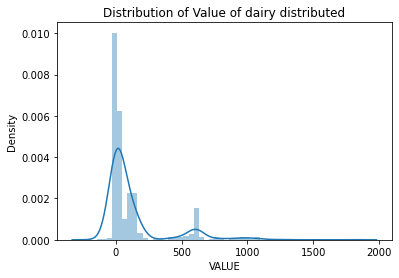

In [17]:
sns.distplot(data_Supply['VALUE']).set(title='Distribution of Value of dairy distributed')
plt.show()

<h1>Stratified Sampling</h1>
I have used Stratified Sampling, the population is divided into groups based on characteristics.
The two data charachteristics I chose for the strata are 'Year' and 'Product Type	' 

In [18]:
data_Supply.groupby(['Year','Product Type'], group_keys=False).apply(lambda x: x.sample(1))

,STATISTIC,Statistic Label,TLIST(A1),Year,C02064V02491,Product Type,UNIT,VALUE
101,ABA02C02,Dairy Imports,1992,1992,4,Butter,Tonnes,2.0
900,ABA02C10,Consumption per Person of Dairy Products (Kg),1992,1992,3,Cheese,Kg,5.0
802,ABA02C09,Consumption per Person of Dairy Products (Litres),1992,1992,5,Cream,Litres,3.0
504,ABA02C06,Dairy Products for Domestic Use,1992,1992,11,Drinking Milk & Buttermilk,Tonnes,615.0
303,ABA02C04,Dairy Exports,1992,1992,6,Milk Powder,Tonnes,294.0
...,...,...,...,...,...,...,...,...
396,ABA02C04,Dairy Exports,2011,2011,4,Butter,Tonnes,145.0
695,ABA02C07,Dairy Products for Industrial Uses,2011,2011,3,Cheese,Tonnes,0.0
697,ABA02C07,Dairy Products for Industrial Uses,2011,2011,5,Cream,Tonnes,15.0
99,ABA02C01,Usable Dairy Production,2011,2011,11,Drinking Milk & Buttermilk,Tonnes,544.0


I will drop the unneccesary column as we have no background information on what data that feature represents or a reference to transforems the data into a usable source.

In [19]:
data_Supply = data_Supply.drop(['C02064V02491'], axis=1)

In [20]:
data_Supply['Product Type'].value_counts()

Cheese                        220
Butter                        220
Cream                         220
Milk Powder                   220
Drinking Milk & Buttermilk    220
Name: Product Type, dtype: int64

Within the dataset for the sales of dairy throughout the years in Ireland we have 5 different categories representing the items as displayed with the value counts of the product type feature.

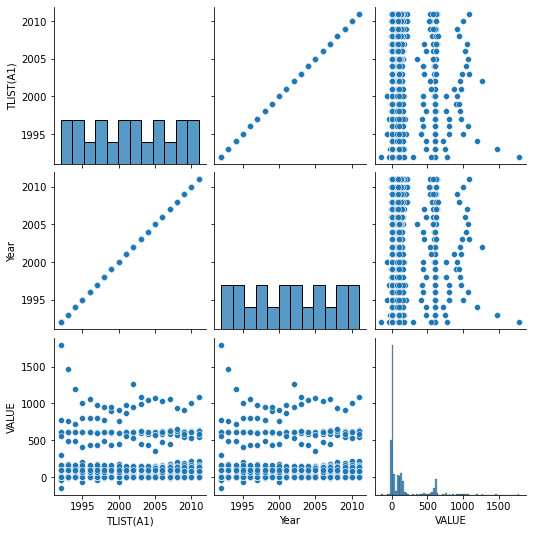

In [21]:
sns.pairplot(data_Supply)

# EU Dairy Cattle Supply Data

<h3>Country Key ID's for Numeric Dataframe</h3>
I have supplied the country codes for reference with use with the numeric only dataframe of EU Dairy cattle stocks.
<ul>
  <li>0: Austria</li>
  <li>1: Belgium</li>
  <li>2: Bulgaria</li>
  <li>3: Croatia</li>
  <li>4: Cyprus</li>
  <li>5: Czechia</li>
  <li>6: Denmark</li>
  <li>7: Estonia</li>
  <li>8: Finland</li>
  <li>9: France</li>
  <li>10: Germany</li>
  <li>11: Greece</li>
  <li>12: Hungary</li>
  <li>13: Ireland</li>
  <li>14: Italy</li>
  <li>15: Lithuania</li>
  <li>16: Luxembourg</li>
  <li>17: Malta</li>
  <li>19: Netherlands</li>
  <li>20: Poland</li>
  <li>21: Portugal</li>
  <li>22: Romania</li>
  <li>23: Slovakia</li>
  <li>24: Slovenia</li>
  <li>25: Spain</li>
  <li>26: Sweden</li>
</ul>

In [22]:
display(data_Eu)
data_Eu.info()

,Unnamed: 0,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,Unnamed: 24,Annual change,% change
0,Austria,729,698,621,598,589,558,538,534,527,...,538,534,540,543,533,524,525,NaN,1.0,0.1%
1,Belgium,632,619,629,611,591,572,571,548,532,...,519,529,531,519,529,538,541,NaN,3.0,0.6%
2,Bulgaria,421,431,363,359,358,362,369,348,350,...,302,283,279,261,244,227,242,NaN,15.0,6.8%
3,Croatia,:,:,:,:,:,:,:,:,:,...,159,152,147,139,136,130,129,NaN,-1.0,-0.8%
4,Cyprus,24,24,24,24,26,27,26,25,24,...,25,26,28,30,32,35,37,NaN,2.0,4.8%
5,Czechia,583,548,529,496,464,449,429,437,417,...,372,369,367,365,359,361,357,NaN,-4.0,-1.2%
6,Denmark,680,681,644,628,613,589,569,558,555,...,547,570,565,575,570,563,565,NaN,2.0,0.4%
7,Estonia,159,138,131,129,116,117,117,113,109,...,96,91,86,86,85,85,84,NaN,-1.0,-0.8%
8,Finland,380,374,358,352,343,328,318,313,298,...,283,282,275,271,264,259,256,NaN,-3.0,-1.3%
9,France,"4,432","4,424","4,153","4,197","4,134","4,026","3,947","3,895","3,799",...,"3,661","3,637","3,637","3,597","3,554","3,491","3,434",NaN,-57.0,-1.6%


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     33 non-null     object 
 1   1998           33 non-null     object 
 2   1999           33 non-null     object 
 3   2000           33 non-null     object 
 4   2001           32 non-null     object 
 5   2002           32 non-null     object 
 6   2003           32 non-null     object 
 7   2004           32 non-null     object 
 8   2005           32 non-null     object 
 9   2006           32 non-null     object 
 10  2007           32 non-null     object 
 11  2008           32 non-null     object 
 12  2009           32 non-null     object 
 13  2010           33 non-null     object 
 14  2011           33 non-null     object 
 15  2012           33 non-null     object 
 16  2013           33 non-null     object 
 17  2014           33 non-null     object 
 18  2015        

As we can see the data for the EU countries is formatted where the year is the column featuring rows with the corresponding countrises within the EU. I have removed the unnecessary and unformatted data as features such as <code>Unnamed: 0</code> have no use in any data analysis without the documentation that is not present in this case.

I then created a seperated dataframe which contained the EU dairy cattle distribution and formatted it to remove special charachters any values that contained strings and converted the whole dataframe to an integer. As the year and country wasn't in the correct format I transposed the dataframe to make the feature selection the countries within the dataframe rather than the year.

In [23]:
data_Eu = data_Eu.rename(columns={"Unnamed: 0": "Countries"})
del data_Eu['Annual change']
del data_Eu['% change']
del data_Eu['Unnamed: 24']
data_Eu = data_Eu.drop(labels=[27,28,29,30,31,32], axis=0)
data_Eu = data_Eu.fillna(0)

In [24]:
int_data_Eu = data_Eu.drop(labels="Countries",axis=1)
int_data_Eu = int_data_Eu.replace({':': 0}, regex=True)
# removing special charachters from the objects in order to avoid ValueError: invalid literal for int() with base 10.
int_data_Eu = int_data_Eu.replace('\W', '', regex=True)
int_data_Eu = int_data_Eu.transpose()
int_data_Eu = int_data_Eu.astype(int)
int_data_Eu.info()
display(int_data_Eu)

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1998 to 2020
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       23 non-null     int32
 1   1       23 non-null     int32
 2   2       23 non-null     int32
 3   3       23 non-null     int32
 4   4       23 non-null     int32
 5   5       23 non-null     int32
 6   6       23 non-null     int32
 7   7       23 non-null     int32
 8   8       23 non-null     int32
 9   9       23 non-null     int32
 10  10      23 non-null     int32
 11  11      23 non-null     int32
 12  12      23 non-null     int32
 13  13      23 non-null     int32
 14  14      23 non-null     int32
 15  15      23 non-null     int32
 16  16      23 non-null     int32
 17  17      23 non-null     int32
 18  18      23 non-null     int32
 19  19      23 non-null     int32
 20  20      23 non-null     int32
 21  21      23 non-null     int32
 22  22      23 non-null     int32
 23  23      23 non-nu

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
1998,729,632,421,0,24,583,680,159,380,4432,...,47,0,1600,3361,372,0,265,147,1278,471
1999,698,619,431,0,24,548,681,138,374,4424,...,45,0,1570,3215,357,0,251,149,1207,447
2000,621,629,363,0,24,529,644,131,358,4153,...,44,0,1532,2982,329,0,243,140,1141,426
2001,598,611,359,0,24,496,628,129,352,4197,...,44,8,1551,2930,305,1620,230,136,1182,425
2002,589,591,358,0,26,464,613,116,343,4134,...,42,8,1546,2935,299,1627,230,140,1154,403
2003,558,572,362,0,27,449,589,117,328,4026,...,41,8,1551,2816,288,0,214,131,1118,404
2004,538,571,369,0,26,429,569,117,318,3947,...,41,8,1502,2730,297,1566,202,134,1057,401
2005,534,548,348,0,25,437,558,113,313,3895,...,41,8,1486,2755,285,1625,199,120,1018,391
2006,527,532,350,0,24,417,555,109,298,3799,...,46,7,1443,2637,270,1639,185,113,942,385
2007,525,524,336,225,24,407,551,103,288,3759,...,40,8,1490,2677,269,1573,180,117,903,366


Here I have displayed the averages for the selected countries to get a better understanding of what country might have a similar distribution of the cattle quantity.

In [25]:
av_column = int_data_Eu.mean(axis=0)
display(av_column)

0      557.826087
1      548.695652
2      320.913043
3      103.608696
4       26.260870
5      416.695652
6      585.260870
7      105.652174
8      301.913043
9     3830.695652
10    4267.173913
11     136.956522
12     279.956522
13    1155.869565
14    1927.869565
15     175.217391
16     369.086957
17      46.391304
18       5.956522
19    1568.565217
20    2570.086957
21     269.608696
22    1104.304348
23     176.739130
24     118.826087
25     948.565217
26     368.521739
dtype: float64

# EU Supply data analysed and compared
In order to find the correct country with similar supply of dairy cattle numbers I must run a few inferential statistical techniques to compare them. 

<h3>Hypothesis</h3>
The population distribution of Dairy cattle has been equal between the country of Romania and Ireland according to thew EU data statistics collected from 1998 to 2020.

In [26]:
# Assigning the values of the countries within the converted fully numeric dataframe
Ireland = int_data_Eu[13]
print("Ireland Mean: " + str(Ireland.mean()))
Romania = int_data_Eu[22]
print("Romania Mean: " + str(Romania.mean()))
Spain = int_data_Eu[25]
print("Spain Mean: " + str(Spain.mean()))

Ireland Mean: 1155.8695652173913
Romania Mean: 1104.304347826087
Spain Mean: 948.5652173913044


<h2>Z-test</h2>
The Z Test can be used to ascertain if there is a significant difference in amounts between the countries. In this scenario, the null hypothesis is that the growth and quantity of dairy cattle in both countries are equal. The hypothesis test would enable us to support or refute this claim. Usually, for hypothesis tests, a 5% level of significance is applied and the claim is rejected if the p-value is less than the level of significance.

In [27]:
Country_MD = Ireland.mean() - Romania.mean() 
ztest(Ireland, Romania, value=Country_MD)

(0.0, 1.0)

<h2>T-test</h2>
The T-Test has a similar purpose as the Z-Test. However, it is applied when the population standard deviation is not known, or for samples with small sample sizes usually where the sample size is lower than 30.

In [28]:
st.ttest_1samp(Ireland, popmean=Romania.mean())

Ttest_1sampResult(statistic=1.7809032442726092, pvalue=0.08874237530230429)

<h2>Pearson Correlation Test</h2>
The correlation test tests if the relationship between these variables is statistically significant. The Pearson Correlation Coefficient is a popular correlation coefficient that measures the linear relationship between 2 variables. In this case I  used Pearson Correlation.

In this case I will be testing the correlation of dairy cattle quantity between the two countries of Irland and spain for analysis in patterns between the country's growth in Dairy farming.

The <code>pearsonr</code> function on Scipy returns the correlation coefficient and tests if the correlation is significant

<h3>Conclusions</h3>
Unfortunately the test resulted in a nagative correlation for unknown reasons as the average and general series of data is the most similar between these 2 countries in both given cases as proven by the dataset data itself and research conducted. 

It has however shown us that the correlation between the Irish and Spanish data is greater than the Irish and Romanian data.

In [29]:
st.pearsonr(Ireland, Spain)

(-0.15535041554379964, 0.4790683760078812)

In [30]:
st.pearsonr(Ireland, Romania)

(-0.21383333793493, 0.32722741386644627)

<h2>Wilcoxon Test</h2>
The Wilcoxon signed-rank test is the non-parametric univariate test which is an alternative to the dependent t-test. It also is called the Wilcoxon T test, most commonly so when the statistic value is reported as a T value. Which scipy.stats.wilcoxon() uses for it’s calculation. This is the recommended test to use when the data violates the assumption of normality; which is the case with this data so far.

Both of the variables have a significant p-value which means each variable violates the assumption of normality. Therefore, the Wilcoxon signed rank test, a.k.a the Wilcoxon T test, is the correct test to use to analyze this data.

<h3>Conclusions</h3>
As we can see the test proved more succesful than the last series executed for analysis with a P-Value of <code>0.776785135269165</code>. This in my opinion derives from thew lack of normal distribution within the dataset structure.

In [31]:
print('Ireland:')
print(st.shapiro(Ireland))
print('Romania:')
print(st.shapiro(Romania))
st.wilcoxon(Ireland, Romania)

Ireland:
ShapiroResult(statistic=0.8945345878601074, pvalue=0.01953703537583351)
Romania:
ShapiroResult(statistic=0.7398244738578796, pvalue=4.8182504542637616e-05)


WilcoxonResult(statistic=128.0, pvalue=0.776785135269165)

<h2>Chi-Square Test</h2>
To run the Chi-Square Test, the easiest way is to convert the data into a contingency table with frequencies. I will use the crosstab command from pandas.

<h3>Conclusions</h3>


<h3>Chi-Square (Ireland and Romania)</h3>

<AxesSubplot:xlabel='22', ylabel='13'>

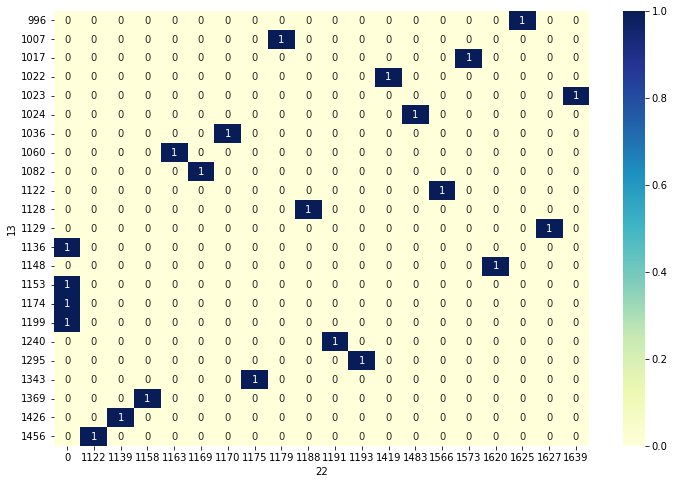

In [32]:
contigency= pd.crosstab(Ireland, Romania, normalize='index') 
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [33]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

0.2513008139441771


<h3>Chi-Square (Ireland and Spain)</h3>

<AxesSubplot:xlabel='25', ylabel='13'>

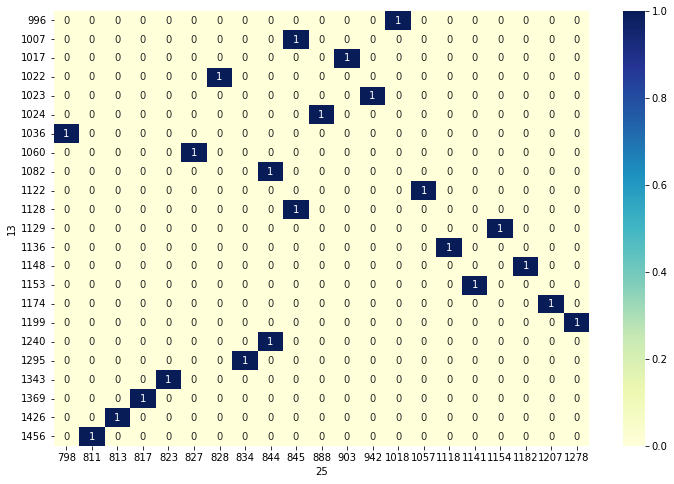

In [34]:
contigency= pd.crosstab(Ireland, Spain, normalize='index') 
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [35]:
# Chi-square test of independence
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

0.24615506857308492


<h1>References</h1>
Awojide, Margaret. “Statistics for Data Analysts: Inferential Statistics with Python.” CodeX, 14 Sept. 2022, medium.com/codex/statistics-for-data-analysts-inferential-statistics-with-python-de8b7f49cfa. Accessed 5 Jan. 2023.

Hirsch, Stefan, et al. “Dataset on the Dairy Processing Industry in France, Italy, Poland and Spain.” Www.research-Collection.ethz.ch, 2019, www.research-collection.ethz.ch/handle/20.500.11850/333174, 10.3929/ethz-b-000333174. Accessed 4 Jan. 2023.

“Python Pandas - Descriptive Statistics - Tutorialspoint.” Www.tutorialspoint.com, www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm.

“Python Z Test | When to Perform Z Test in Python with Examples?” EDUCBA, 13 Feb. 2022, www.educba.com/python-z-test/.

Shane. “Delete Rows & Columns in DataFrames Using Pandas Drop.” Www.shanelynn.ie, www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/.

Stojiljković, Mirko. “Python Statistics Fundamentals: How to Describe Your Data – Real Python.” Realpython.com, realpython.com/python-statistics/.

Thu, et al. “Irish Dairy’s Elevated Position across Range of Global Metrics.” Irish Examiner, 7 Oct. 2021, www.irishexaminer.com/farming/arid-40715282.html.

“UK and EU Cow Numbers | AHDB.” Ahdb.org.uk, 2019, ahdb.org.uk/dairy/uk-and-eu-cow-numbers.

Zach. “How to Calculate Confidence Intervals in Python.” Statology, 16 July 2020, www.statology.org/confidence-intervals-python/.

---. “Pandas: How to Remove Special Characters from Column.” Statology, 10 Oct. 2022, www.statology.org/pandas-remove-special-characters/. Accessed 4 Jan. 2023.